#                                         TITANIC PROJECT

# Created by Harshit Agarwal @ 20/03/2018

IMPORT STATEMENTS

In [156]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
#          Making DataFrame as titanic_df
titanic_df=pd.read_csv('train.csv')
titanic_df.head()  # First Five Row's of dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
titanic_df.tail()  # Last five row's of dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [159]:
titanic_df.info()    # Information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [160]:
titanic_df.describe()    # Description of dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

So let's start with the first question: Who were the passengers on the titanic?

In [161]:
y=titanic_df['Sex'].value_counts()
y

male      577
female    314
Name: Sex, dtype: int64

In [162]:
male=y['male']       # No. of males
male

577

In [163]:
female=y['female']  # No. of Females
female

314

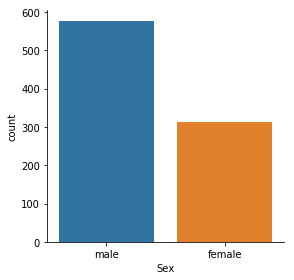

In [164]:
sns.factorplot('Sex',kind='count',data=titanic_df)    # Factorplot of Gender

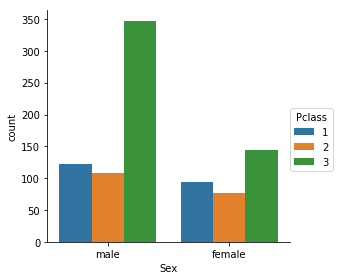

In [165]:
sns.factorplot('Sex',kind='count',data=titanic_df,hue='Pclass')         # Class wise distrubution

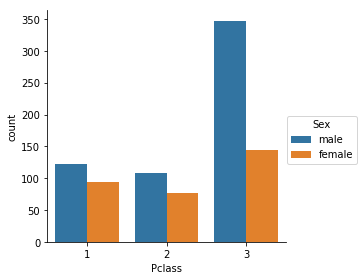

In [166]:
sns.factorplot('Pclass',kind='count',data=titanic_df,hue='Sex')    # MALE/FEMALE IN EACH CLASS

In [167]:
def male_female_child(passenger):                 # Function for seperating male,female and child
    age,sex=passenger
    
    if(age<16):
        return 'child'
    else:
        return sex

In [168]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)   # Person column

In [169]:
titanic_df['person'].head(10)   # First 10 row's of person column

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7     child
8    female
9     child
Name: person, dtype: object

In [170]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [171]:
titanic_df.tail()     # last five row's of dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,male
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,male


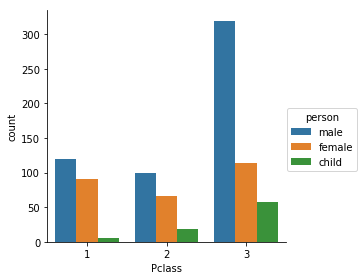

In [172]:
sns.factorplot('Pclass',data=titanic_df,kind='count',hue='person')  # Classwise details of persons

In [173]:
titanic_df['person'].value_counts()    # No. of male,female and child's

male      537
female    271
child      83
Name: person, dtype: int64

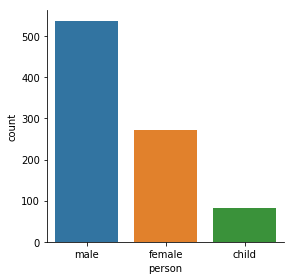

In [174]:
sns.factorplot('person',data=titanic_df,kind='count')    # Factorplot of persons

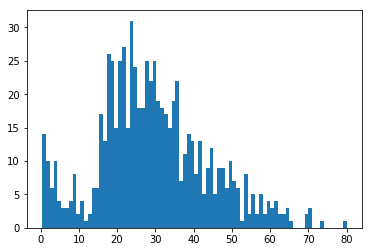

In [175]:
titanic_df['Age'].hist(bins=80,grid=False)     # Histogram of Age Distribution

In [176]:
titanic_df['Age'].mean()      # Mean of Age

29.69911764705882

In [177]:
titanic_df['Age'].median()     # Median of Age

28.0

In [178]:
titanic_df['Age'].min()        # Minimum of Age

0.41999999999999998

In [179]:
titanic_df['Age'].max()        # Maximum of Age

80.0

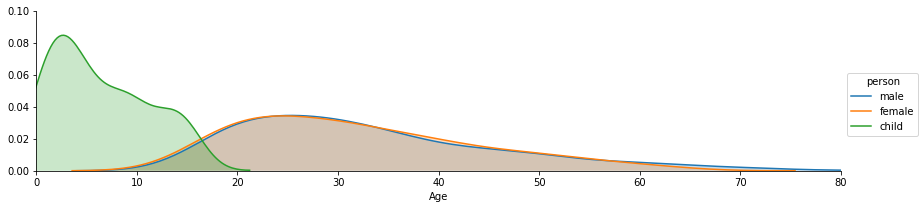

In [180]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=4)          # KDE Plot using FacetGrid
fig.map(sns.kdeplot,'Age',shade=True)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest),ylim=(0,0.1))
fig.add_legend()

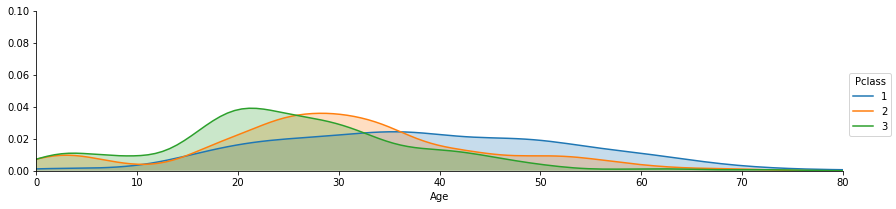

In [181]:
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)     # Let;s do it with pclass
fig.map(sns.kdeplot,'Age',shade=True,bw='silverman')
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest),ylim=(0,0.1))
fig.add_legend()

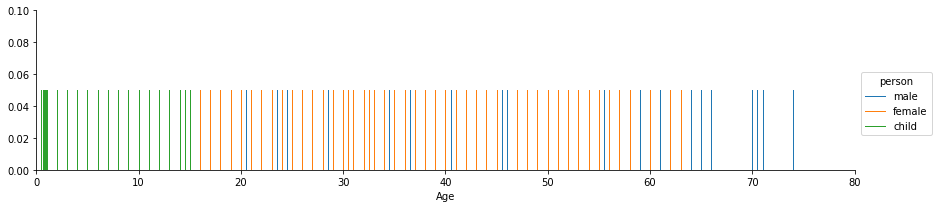

In [182]:
fig=sns.FacetGrid(titanic_df,hue='person',aspect=4)   # Rugplot with facetgrid
fig.map(sns.rugplot,'Age',height=0.5)
oldest=titanic_df['Age'].max()
fig.set(xlim=(0,oldest),ylim=(0,0.1))
fig.add_legend()

2.) What deck were the passengers on and how does that relate to their class?

In [183]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [184]:
deck=titanic_df['Cabin'].dropna()

In [185]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

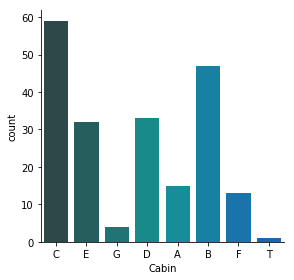

In [186]:
# Function for creating level object
levels=[]
for level in deck:
    levels.append(level[0])

cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin',data=cabin_df,kind='count',palette='winter_d')   # Factorplot for deck levels

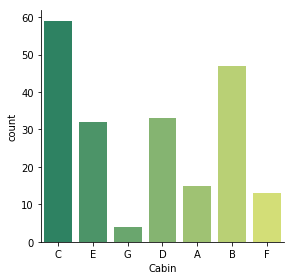

In [187]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin',data=cabin_df,kind='count',palette='summer')

3.) Where did the passengers come from?

In [188]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [189]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

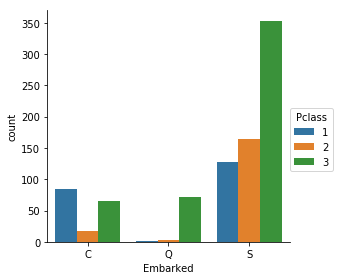

In [190]:
# Factorplot for the city where the passengers came from
sns.factorplot('Embarked',kind='count',data=titanic_df,order=['C','Q','S'],hue='Pclass')

4.) Who was alone and who was with family?

In [191]:
titanic_df['Alone Status']=titanic_df['SibSp']+titanic_df['Parch']
titanic_df['Alone Status']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone Status, Length: 891, dtype: int64

In [192]:
titanic_df['Alone Status'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Alone Status, dtype: int64

In [193]:
titanic_df['Alone Status'].loc[titanic_df['Alone Status'] >0] = 'With Family'
titanic_df['Alone Status'].loc[titanic_df['Alone Status'] == 0] = 'Alone'


E:\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [194]:
titanic_df['Alone Status'].value_counts()

Alone          537
With Family    354
Name: Alone Status, dtype: int64

In [195]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


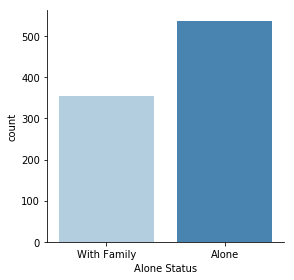

In [196]:
sns.factorplot('Alone Status',data=titanic_df,kind='count',palette='Blues')     #Factorplot for Alone Status

In [197]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [198]:
# Lets create a column for survivor by mapping
titanic_df['Survivor']=titanic_df['Survived'].map({0:'no',1:'yes'})
titanic_df['Survivor'].value_counts()

no     549
yes    342
Name: Survivor, dtype: int64

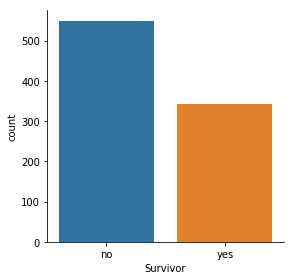

In [199]:
sns.factorplot('Survivor',data=titanic_df,kind='count')    # FActorplot for survivor

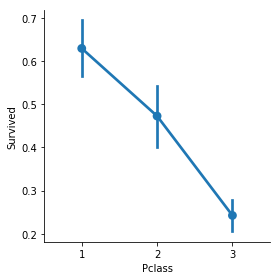

In [200]:
# Lets check the survival rate by class
sns.factorplot('Pclass','Survived',data=titanic_df)

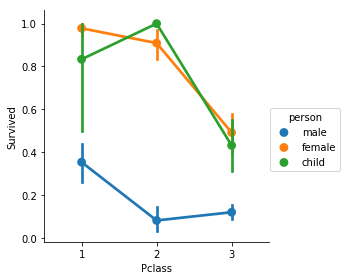

In [201]:
# Lets do it for persons
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

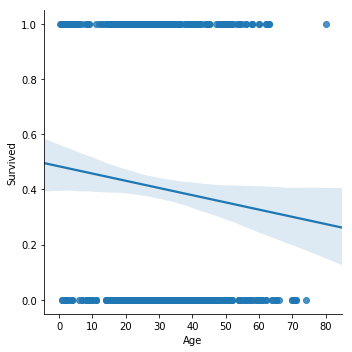

In [202]:
# Lets see the ages of person being survived
sns.lmplot('Age','Survived',data=titanic_df)

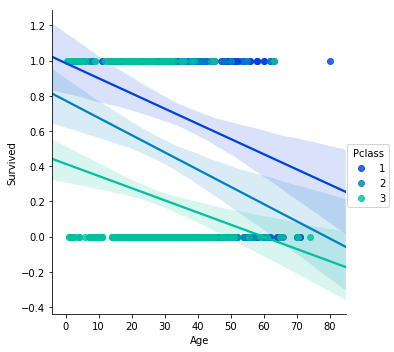

In [203]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

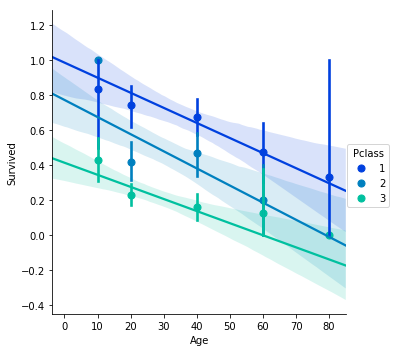

In [204]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

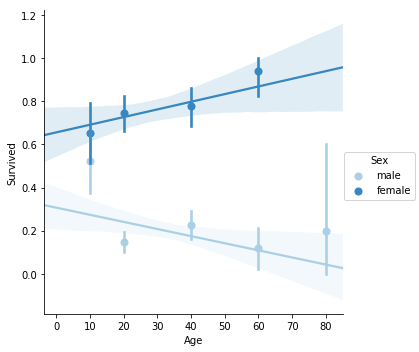

In [205]:
# Lets combine gender with age
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations,palette='Blues')

THANK YOU

#                                           END OF PROJECT